## Analyse der CO₂-Emissionen im Logistikbereich

### --------------------------------------------
### Logistics CO₂ Emissions Analysis
### --------------------------------------------

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### --------------------------------------------
### Load dataset
### --------------------------------------------

In [14]:
# Load Dataset
df = pd.read_csv("logistics_emissions_dataset.csv")

print(df.info())
df.head(6)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Shipment ID      900 non-null    object 
 1   Origin           900 non-null    object 
 2   Destination      900 non-null    object 
 3   Mode             900 non-null    object 
 4   Distance_km      900 non-null    int64  
 5   Weight_tons      900 non-null    float64
 6   Emissions_kgCO2  900 non-null    float64
 7   Year             900 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 56.4+ KB
None


,Shipment ID,Origin,Destination,Mode,Distance_km,Weight_tons,Emissions_kgCO2,Year
0,S0001,Hamburg,Paris,Truck,872,46.81,3673.65,2018
1,S0002,Rotterdam,Zürich,Air,1089,13.24,7209.18,2016
2,S0003,Rotterdam,Mailand,Truck,1772,38.40,6124.03,2021
3,S0004,Bremen,Mailand,Rail,1214,31.31,1330.36,2016
4,S0005,Rotterdam,Paris,Ship,309,85.55,396.52,2019
5,S0006,Rotterdam,Paris,Rail,1804,33.08,2088.67,2015


### --------------------------------------------
### Total Emissions per Mode
### --------------------------------------------

In [4]:
# Total Emissions per Mode
total_emissions = df.groupby("Mode")["Emissions_kgCO2"].sum().sort_values(ascending=False)
print("Total Emissions per Mode:\n", total_emissions)


Total Emissions per Mode:
 Mode
Air      8298154.78
Truck    1290831.60
Rail      474306.39
Ship      271734.77
Name: Emissions_kgCO2, dtype: float64


### --------------------------------------------
### Average Emissions per Shipment by Mode
### --------------------------------------------

In [5]:
# Average Emissions per Shipment by Mode
avg_emissions = df.groupby("Mode")["Emissions_kgCO2"].mean()
print("\nAverage Emissions per Shipment by Mode:\n", avg_emissions)



Average Emissions per Shipment by Mode:
 Mode
Air      36395.415702
Rail      2237.294292
Ship      1104.612886
Truck     6031.923364
Name: Emissions_kgCO2, dtype: float64


### --------------------------------------------
### Emissions per Year 
### --------------------------------------------

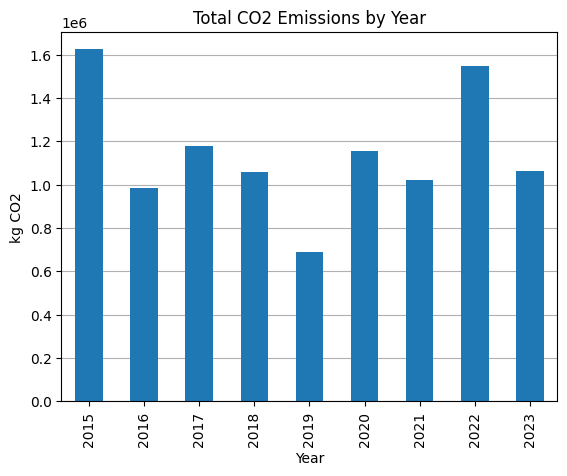

In [6]:
# Emissions per Year bar plot
df.groupby("Year")["Emissions_kgCO2"].sum().plot(kind="bar", zorder=2)
plt.title("Total CO2 Emissions by Year")
plt.ylabel("kg CO2")
plt.grid(True, axis='y', which='major', zorder=1)
plt.show()


### --------------------------------------------
### Emissions per Ton-Kilometer calculation
### --------------------------------------------

In [7]:
# Emissions per Ton-Kilometer calculation
df["Emissions_per_tkm"] = df["Emissions_kgCO2"] / (df["Distance_km"] * df["Weight_tons"])
print("\nEmissions per Ton-Kilometer by Mode:\n", df.groupby("Mode")["Emissions_per_tkm"].mean())



Emissions per Ton-Kilometer by Mode:
 Mode
Air      0.500
Rail     0.035
Ship     0.015
Truck    0.090
Name: Emissions_per_tkm, dtype: float64


### --------------------------------------------
###  Most Polluting Routes
### --------------------------------------------

In [15]:
# Top 10 Routes by Emissions
df["Route"] = df["Origin"] + " ➜ " + df["Destination"]
top_routes = df.groupby("Route")["Emissions_kgCO2"].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Routes by Emissions:\n", top_routes)



Top 10 Routes by Emissions:
 Route
Bremen ➜ Wien       532515.64
Antwerp ➜ Zürich    531581.10
Gdańsk ➜ Berlin     481252.43
Bremen ➜ Mailand    476099.55
Hamburg ➜ Berlin    454322.45
Bremen ➜ Paris      437486.27
Gdańsk ➜ München    426430.30
Gdańsk ➜ Wien       390379.36
Hamburg ➜ Wien      390244.01
Hamburg ➜ Lyon      389284.10
Name: Emissions_kgCO2, dtype: float64


### --------------------------------------------
### Emissions Distribution
### --------------------------------------------

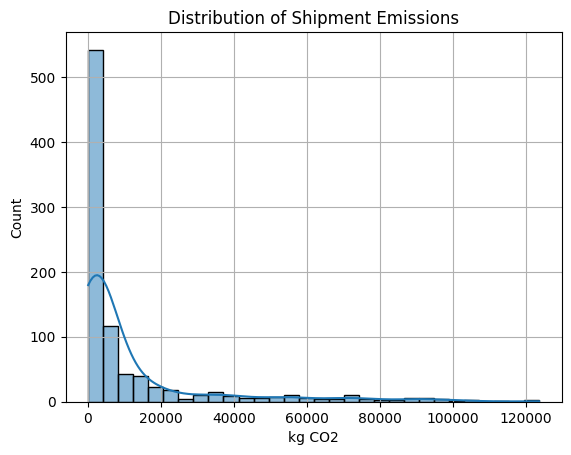

In [16]:
# Emissions Distribution plot
sns.histplot(df["Emissions_kgCO2"], bins=30, kde=True)
plt.title("Distribution of Shipment Emissions")
plt.xlabel("kg CO2")
plt.grid(True)
plt.show()

### --------------------------------------------
### Compare Modes Over Time
### --------------------------------------------

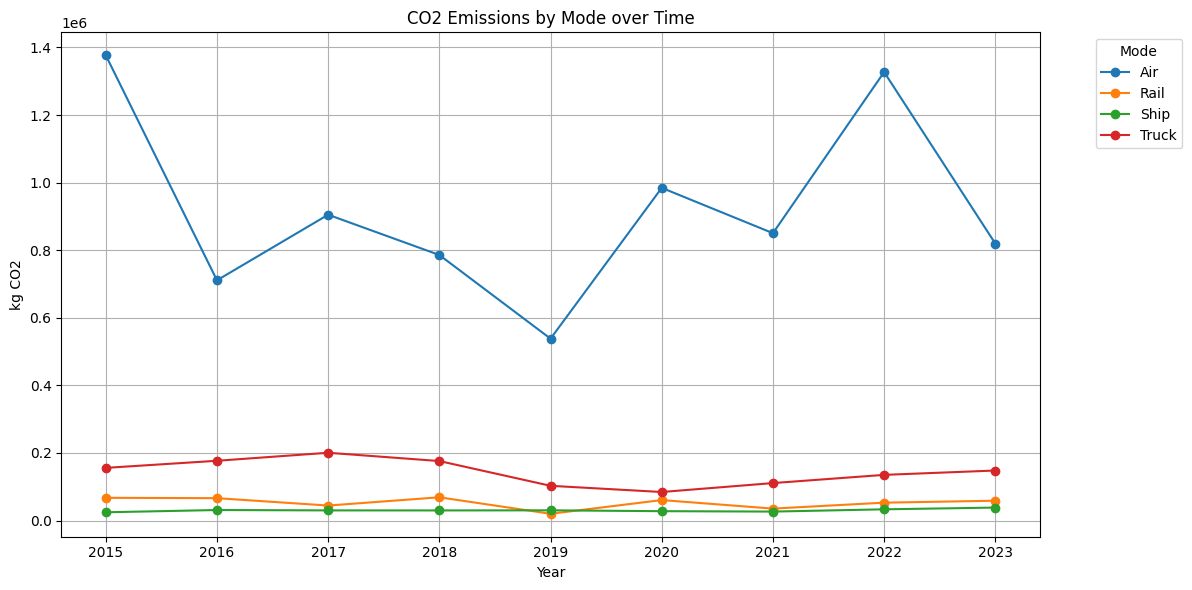

In [17]:
# Emissions by Mode over Time line plot
pivot = df.groupby(["Year", "Mode"])["Emissions_kgCO2"].sum().unstack()
pivot.plot(marker='o', figsize=(12,6))
plt.title("CO2 Emissions by Mode over Time")
plt.ylabel("kg CO2")
plt.grid(True)
plt.legend(title="Mode", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

### --------------------------------------------
### Average Distance by Mode
### --------------------------------------------

In [18]:
# Average Distance by Mode
df.groupby("Mode")["Distance_km"].mean()

Mode
Air      1362.035088
Rail     1253.278302
Ship     1366.000000
Truck    1327.238318
Name: Distance_km, dtype: float64

### --------------------------------------------
### Emissions Share by Mode
### --------------------------------------------

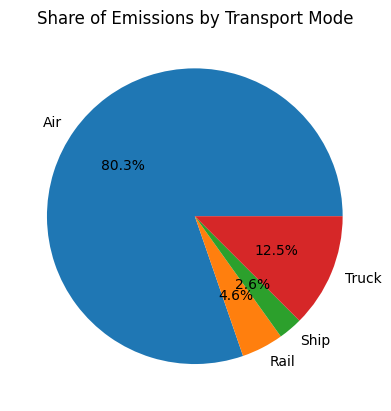

In [19]:
# Emissions Share by Mode
df.groupby("Mode")["Emissions_kgCO2"].sum().plot(kind="pie", autopct='%1.1f%%')
plt.title("Share of Emissions by Transport Mode")
plt.ylabel("")
plt.show()

### --------------------------------------------
### Time Series for Specific Route
### --------------------------------------------

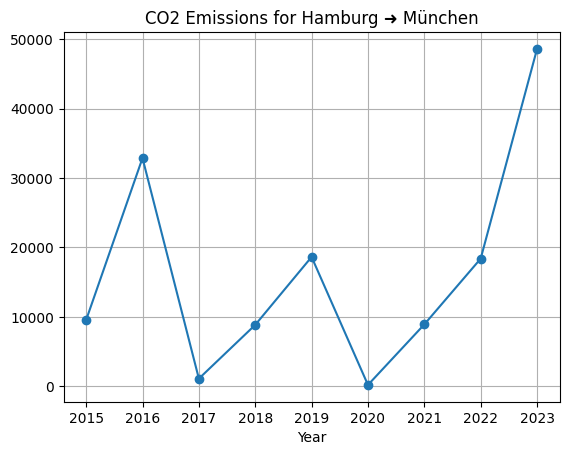

In [20]:
# Time Series for specific Route
route_df = df[df["Route"] == "Hamburg ➜ München"]
route_df.groupby("Year")["Emissions_kgCO2"].sum().plot(marker="o")
plt.title("CO2 Emissions for Hamburg ➜ München")
plt.grid(True)
plt.show()